In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

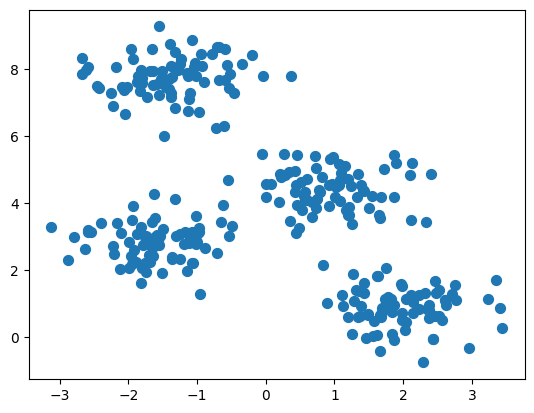

In [2]:
from sklearn.datasets import make_classification, make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60,shuffle=True)

# X.shape
X=pd.DataFrame(X,columns=['Feature1','Feature2'])
y=pd.DataFrame(y,columns=['target'])
plt.scatter(X.iloc[:,0],X.iloc[:,1], s=50)

In [3]:
X.iloc[202,:]

Feature1    1.869860
Feature2   -0.107939
Name: 202, dtype: float64

In [4]:
class KMeans():
    def __init__(self,X,k=5,n_iters=100,toplot=False):
        self.k=k
        self.n_iters=n_iters
        self.X=X.copy()
        self.toplot=toplot
        
        #Initialize the Centroids
        self.centroids=X.iloc[np.random.choice(X.index,self.k,replace=False),:]
        
        
        
    def fit(self):
        
        for _ in range(self.n_iters):
            
            
            #Classify the points according to the centroids 
            clusters=self.get_clusters()

            
            
            #Visualization
            if self.toplot==True:
                self.plot()

            
            
            
            #Update Centroids
            self.old_centroids=self.centroids.copy()
            self.centroids=self.update_centroids()
                       
            
            
            #Check for termination
            if _>1 and self.check_termination():
                break
    
    
    def check_termination(self):
        centroid_difference=np.sum(np.sum((self.centroids-self.old_centroids)**2,axis=1))
        if centroid_difference<=0.005:
            return True
        return False
    
    
    
    def get_clusters(self):
        #Calculate distance of all the points from the all centroids and then take argmin to get closest centroid
        

        self.X_dist=self.X.copy()
        for i,centroid in enumerate(self.centroids.values):
            self.X_dist[f"Distance{i}"]=np.sum((self.X.values-centroid)**2,axis=1)
        
        self.X_dist=self.X_dist.iloc[:,2:]
        self.temp=self.X.copy()
        self.temp['Class']=self.X_dist.idxmin(axis=1).str[-1]
        
    

        
    def plot(self):
        col=self.temp.columns       
        centroid_cols=self.centroids.columns
        
        sns.scatterplot(x=col[0],y=col[1],hue=col[2],data=self.temp)
        plt.scatter(x=self.centroids[centroid_cols[0]],y=self.centroids[centroid_cols[1]],marker="X",c='black')
#         plt.show()
        
        
        
        
    def update_centroids(self):
        new_centroids=[]
        for c in self.temp['Class'].unique():
            new_centroids.append(np.mean(self.X[self.temp['Class']==c]).values)
           
        return pd.DataFrame(new_centroids)
            
        
        
        
    def predict(self,Xtrain):
        display(self.centroids)
        
        distances=dict()
        best_distance=100000000
        best_group=-1
        
        for idx,c in enumerate(self.centroids.values):
            d=np.sum((c-Xtrain)**2)
            distances[tuple(c)]=d
            
            #Why is this not returning index of minimum centroid from self.centroids?
            if d < best_distance:
                best_group=idx
                
            
        self.plot()
        plt.plot(Xtrain[0],Xtrain[1],marker="X",color="cyan")
        plt.show()
        
        m=min(distances,key=distances.get)
        print(best_group)
        
        return min(distances,key=distances.get)
        
        
    #There is some error here !!!!
    def score(self):
        sse=0
        for c in self.temp['Class'].unique():
            
            new_df=self.X[self.temp['Class']==c]
            centre=new_df.mean()
            
            new_df["Distance"]=np.sum((new_df-centre)**2,axis=1)
            sse+=new_df['Distance'].sum()
        return sse
            
            
            
            


,0,1
0,0.831528,4.238698
1,-1.285996,7.637140
2,1.998066,0.850569
3,-1.674296,2.782543


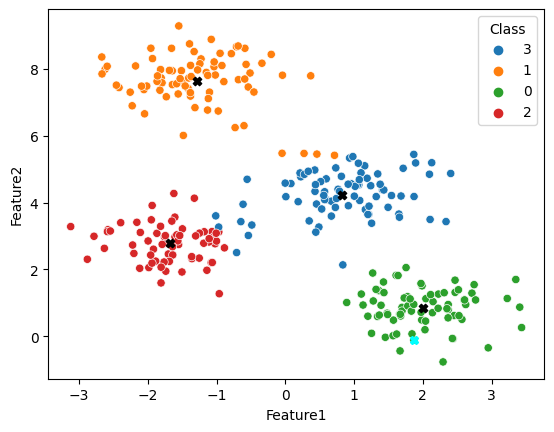

3


(1.9980655935183889, 0.8505692755991201)

In [5]:
clf=KMeans(X,4,5)
clf.fit()
clf.score()

# X.iloc[202,:].values+2.2
clf.predict(X.iloc[202,:].values)

K-means is a popular unsupervised machine learning algorithm used for clustering and classification tasks. It aims to partition a given dataset into k distinct clusters based on their similarity or proximity. Here's a high-level overview of the K-means algorithm:

1. Initialization:

- Select the number of clusters, k, that you want to identify in the dataset.
- Randomly initialize k cluster centroids. These centroids serve as the initial positions for the clusters.

2. Assigning data points to clusters:

- Calculate the distance (e.g., Euclidean distance) between each data point and the centroids.
- Assign each data point to the cluster with the closest centroid. This step is known as the assignment step.


3. Updating the cluster centroids:

-Calculate the mean (centroid) of each cluster by taking the average of the data points assigned to that cluster.
-Update the positions of the centroids to the newly calculated means.

4. Repeat steps 2 and 3:

- Repeat the assignment and centroid update steps until convergence or a stopping criterion is met. Convergence occurs when the centroids no longer change significantly or when a maximum number of iterations is reached.
- The user can also specify the numb of iterations while making the model
Output:

The algorithm outputs the final cluster assignments and the positions of the centroids.
For 2-D DataSet you can visualize the clusters along with the cluster centres.